In [10]:
import torch
import seaborn
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as patches

from pathlib          import Path
from torch.utils.data import TensorDataset, DataLoader
#
### Import local libraries
#
from model import NeuralNetwork
from model import batches

In [8]:
#
### Create a dataframe or load it from file
#
dataframe = pd.DataFrame({"I1": [],
                          "I2": [],
                          "I3": [],
                          "I4": [],
                          "X": [],
                          "Y": []})

data = np.load("../Data/test_data_04152024_LD7.npy")
network = NeuralNetwork()
network.load_state_dict(torch.load("neural_network.pth"))

for i in range(4):
    mean = np.mean(data[i])
    std  = np.std(data[i])
    data[i] = (data[i] - mean) / std    

for x in range(34):
    for y in range(34):
        new_point = pd.DataFrame({"I1": data[0, y, x], 
                          "I2": data[2, y, x], 
                          "I3": data[3, y, x], 
                          "I4": data[1, y, x], 
                          "X": x - 33/2, 
                          "Y": y - 33/2}, index=[0])
        dataframe = pd.concat([dataframe, new_point])
#
### Save full dataset in order
#
X_total   = torch.tensor( dataframe[["I1", "I2", "I3", "I4"]].values.tolist() )
Y_total   = torch.tensor( dataframe[["X", "Y"]].values.tolist() )
total_set = TensorDataset(X_total, Y_total)
total     = DataLoader(total_set, shuffle=False, batch_size=len(X_total))

learning_rate = 1e-2
weight_decay = 1e-4

optimizer = torch.optim.Adam(params=network.parameters(), lr=learning_rate, weight_decay=weight_decay)
criterion = torch.nn.MSELoss(reduction='sum')

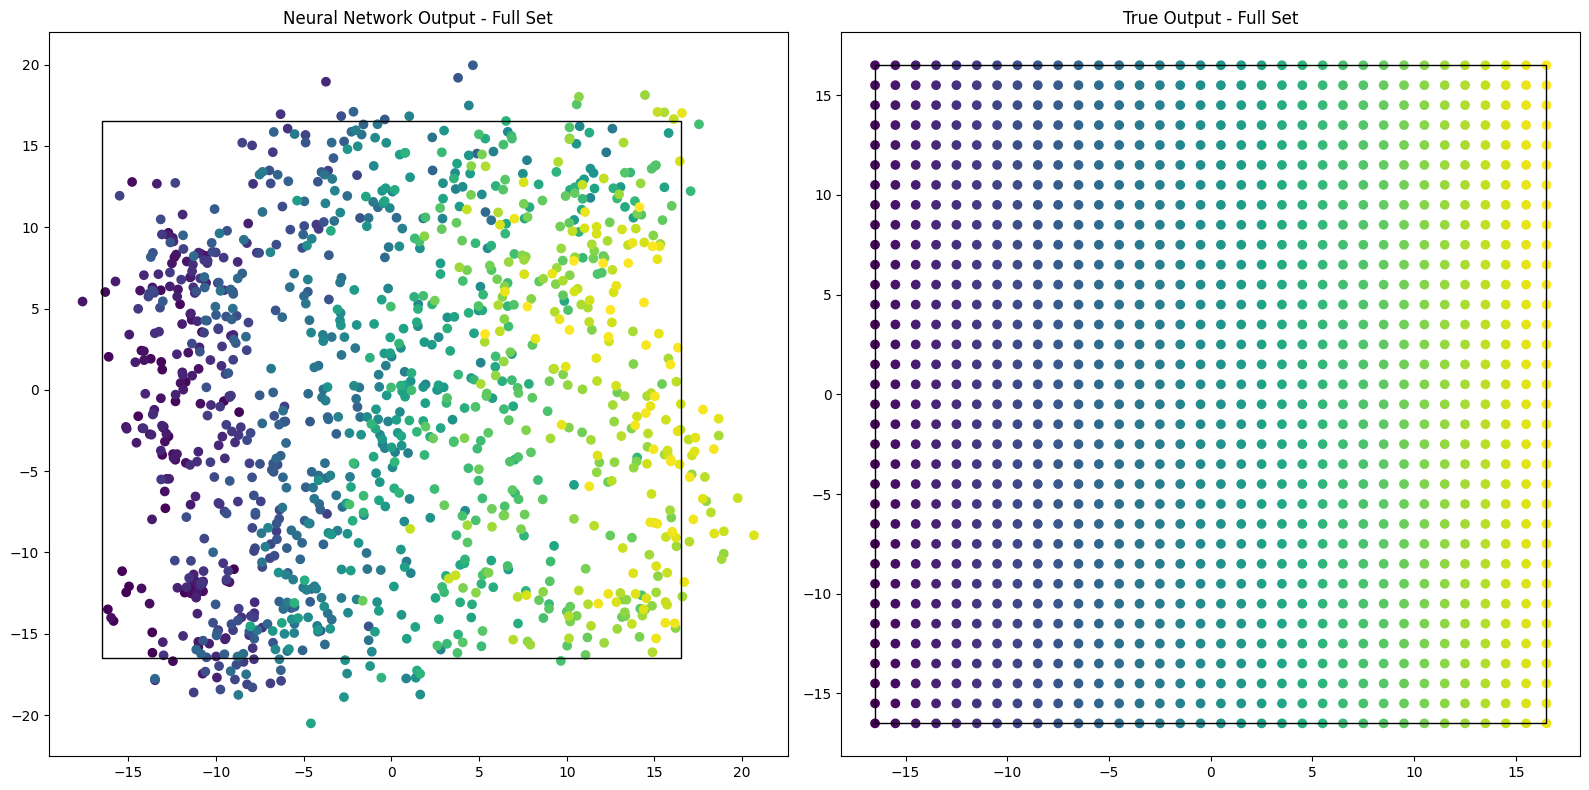

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8), layout='tight')

output, _ = batches(total, network=network, criterion=criterion, optimizer=optimizer, train=False)
colors = range(0, len(X_total))
ax[0].scatter(output[:,0], output[:,1], c=colors, cmap='viridis')
ax[0].set_title("Neural Network Output - Full Set")
ax[0].add_patch(patches.Rectangle((-33/2, -33/2), 33, 33, linewidth=1, edgecolor='k', facecolor='none'))
ax[1].scatter(Y_total[:,0], Y_total[:,1], c=colors, cmap='viridis')
ax[1].set_title("True Output - Full Set")
ax[1].add_patch(patches.Rectangle((-33/2, -33/2), 33, 33, linewidth=1, edgecolor='k', facecolor='none'))

plt.show()